# The Correlation Coefficient

The *correlation coefficient* measures the extent to which the relationship between two variables is learn. Its value is always between -1 and 1. A *positive* coefficient indicates that the variables are directly related, i.e., when one increases, the other one also increases. A *negative* coefficient indicates that the variables are inversely related, so that when one increases, the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables. 

The correlation coefficient of two series $X$ and $Y$ is defined as 

$$r = \frac{Cov(X, Y)}{Std(X)\cdot Std(Y)}$$

where $Cov$ is the covariance and $Std$ is the standard deviation. The two random sets of data will have a correlation coefficient close to 0.

## Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

### Covariance isn't that meaningful by itself

Let's say we have two variables $X$ and $Y$ and we take the covariance of the two.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [18]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.01, 50)

# Calculated the covariance of the two matrices
np.cov(X, Y)[0, 1]

0.18334515770073762

So now what? What does it mean? Correlation uses information about the variance of $X$ and $Y$ to normalize this metric. Once we've normalized this metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

To see how this is done, consider the formula

$$r = \frac{Cov(X, Y)}{Std(X)Std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

To demonstrate this, let's compare the correlation and covariance of the two series:

In [22]:
X = np.random.rand(50)
Y = 2 * X + 4

print(f"Covariance of X and Y: \n{np.cov(X, Y)}")
print(f"Correlation of X and Y: \n{np.corrcoef(X, Y)}")

Covariance of X and Y: 
[[0.09323986 0.18647971]
 [0.18647971 0.37295943]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


### Why do both `np.cov` and `np.corrcoef` return matrices

The covariance matrix is an important concept in statistics. Often, people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable, we have one row and one column. The diagonal is just the variance of that variable, like $Cov(X, X) or $Cov(Y, Y)$. The entries of the diagonal are covariances between different variables. The matrix is symmetric across the diagonal. Let's check that this is true.

In [23]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1
error = cov_matrix[0, 0] - X.var(ddof=1)
print(f"Error: {error}")

Error: -2.7755575615628914e-17


We see a little bit of rounding error, but they are technically the same value.

Correlation: 0.005378728799833575
Built-in Correlation: 0.005271154223836902


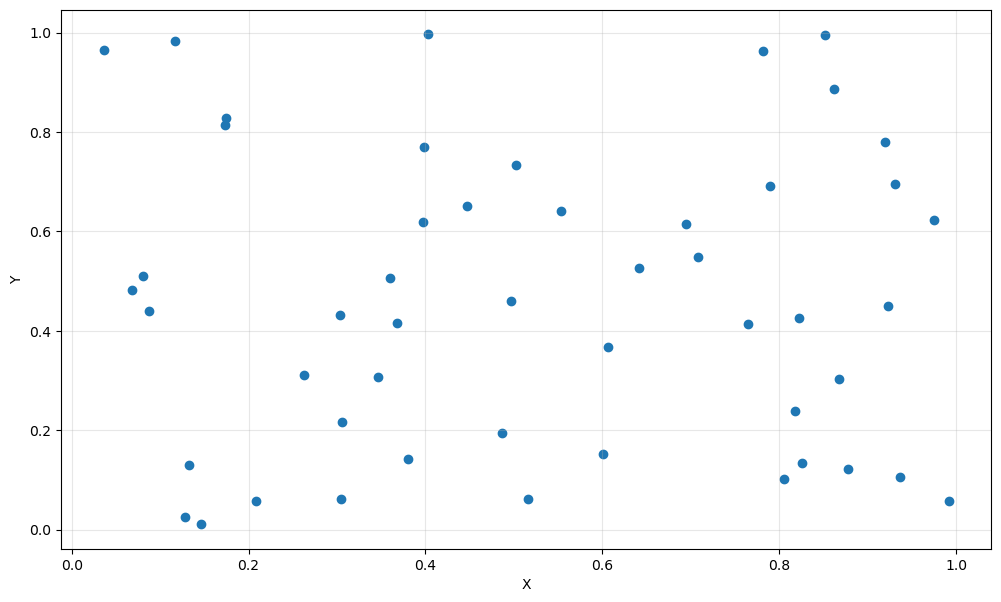

In [27]:
# Two completely random series
X = np.random.rand(50)
Y = np.random.rand(50)

# Plot them
plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y");

# Taking relevant values from the matrix returned by np.cov
print(f"Correlation: {(np.cov(X, Y)[0, 1]) / (np.std(X) * np.std(Y))}")
print(f"Built-in Correlation: {np.corrcoef(X, Y)[0, 1]}")

Now, let's see what two correlated sets of data look like:

Correlation: 0.9557441886644983


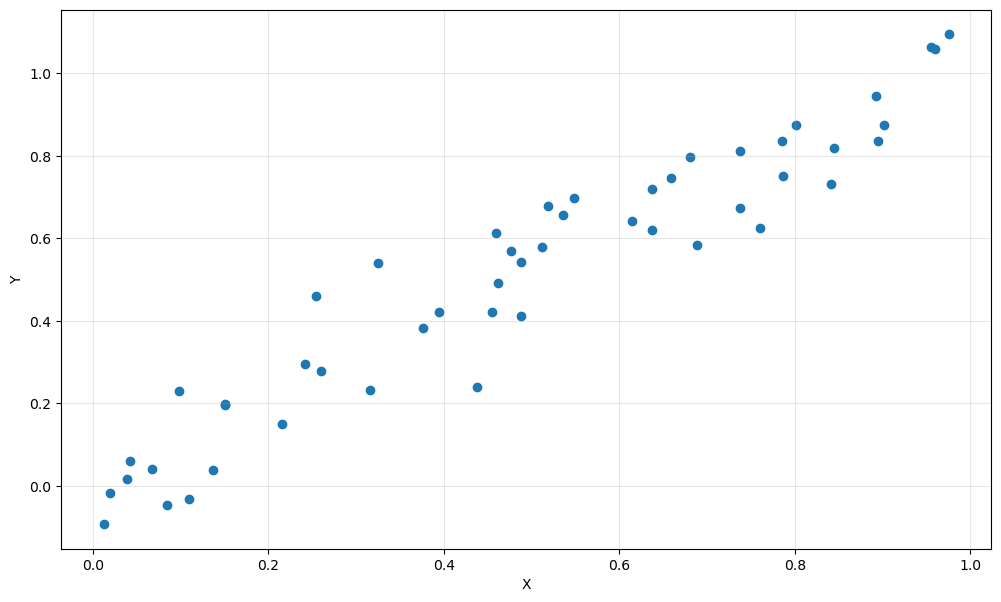

In [28]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y");

print(f"Correlation: {np.corrcoef(X, Y)[0, 1]}")

Let's dial down the relationship by introducing more noise.

Correlation: 0.8607928135243937


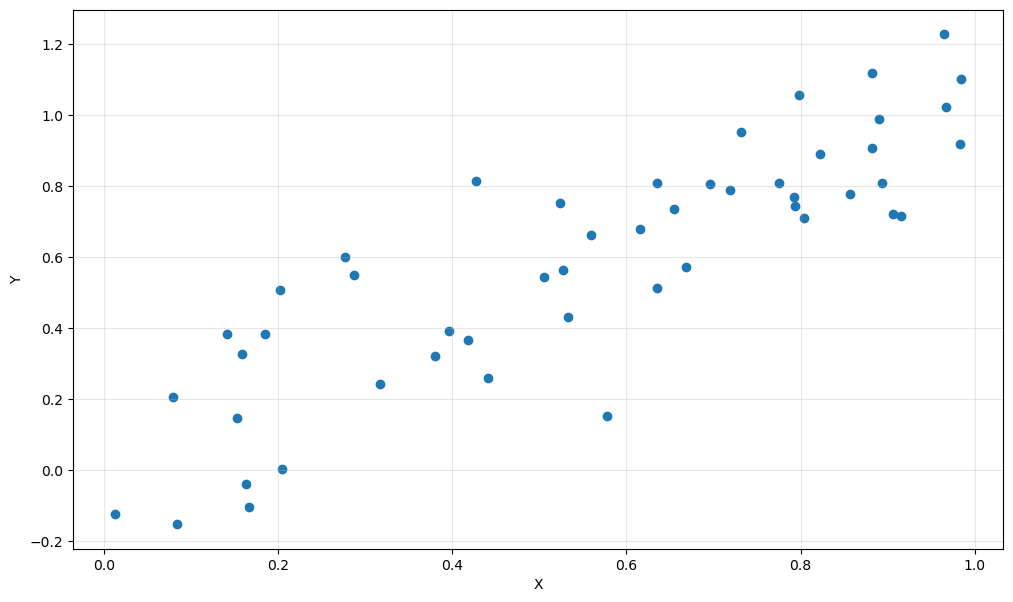

In [31]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y");

print(f"Correlation: {np.corrcoef(X, Y)[0, 1]}")

Finally, let's see what an inverse relationship looks like.

Correlation: -0.9466352231232489


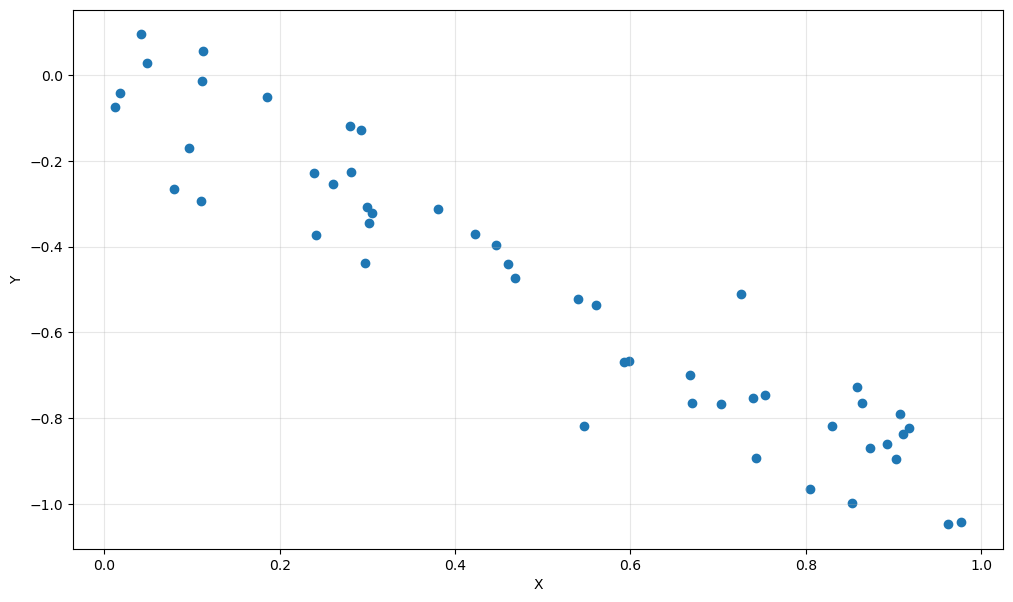

In [32]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y");

print(f"Correlation: {np.corrcoef(X, Y)[0, 1]}")

## How is this useful in finance?

### Determinining the related assets

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. For example, let's look at the price of Apple (AAPL) and a semiconductor equipment manugacturer, Lam Research Corporation (LRCX).

In [33]:
# Mock implementation of get_pricing function
import pandas as pd
import yfinance as yf

_FIELD_MAP = {
    "price": "Close",        # Quantopian "price" ~= daily close
    "open_price": "Open",
    "high": "High",
    "low": "Low",
    "close_price": "Close",
    "volume": "Volume",
    "adj_close": "Adj Close",
}

def get_pricing(symbol, start_date, end_date, fields="price", adjusted=False):
    if isinstance(symbol, str):
        tickers = [symbol]
    else:
        tickers = list(symbol)

    col = _FIELD_MAP.get(fields, fields)

    df = yf.download(
        tickers=tickers,
        start=start_date,
        end=end_date,
        interval="1d",
        auto_adjust=adjusted,
        actions=False,
        progress=False,
        group_by="ticker",
    )

    # Case 1: MultiIndex columns: (ticker, field)
    if isinstance(df.columns, pd.MultiIndex):
        # return Series for single ticker, DataFrame for multi tickers
        if len(tickers) == 1:
            t = tickers[0]
            if (t, col) not in df.columns:
                raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)}")
            out = df[(t, col)].copy()
            out.name = t
            return out
        else:
            out = {}
            for t in tickers:
                if (t, col) not in df.columns:
                    raise KeyError(f"Missing {(t, col)}. Available: {list(df.columns)[:10]} ...")
                out[t] = df[(t, col)]
            return pd.DataFrame(out)

    # Case 2: Flat columns: "Open", "High", ...
    else:
        if col not in df.columns:
            raise KeyError(f"Field '{fields}' mapped to '{col}' not found. Available: {list(df.columns)}")
        if len(tickers) == 1:
            out = df[col].copy()
            out.name = tickers[0]
            return out
        else:
            # In flat-column case with multiple tickers, yfinance usually returns MultiIndex,
            # but handle defensively anyway.
            return df[col].copy()

Correlation coefficients
LRCX and AAPL: 0.9547035303909479
LRCX and SPY : 0.9352035123001265
AAPL and SPY : 0.8921746233896477


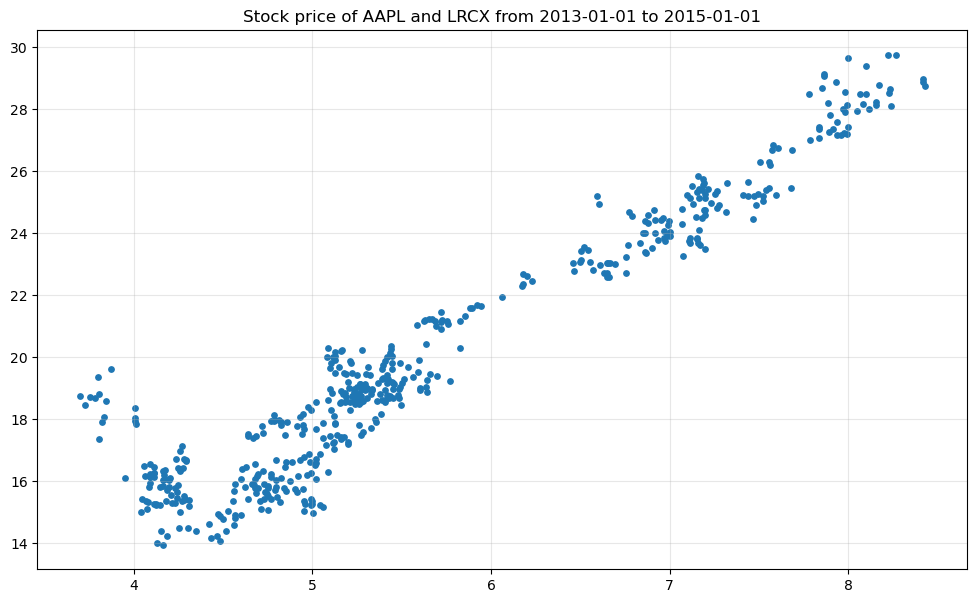

In [43]:
# Pull the pricing of data for the two stocks and S&P 500
start = "2013-01-01"
end   = "2015-01-01"
bench = get_pricing("SPY", fields="price", start_date=start, end_date=end, adjusted=False)
a1    = get_pricing("LRCX", fields="price", start_date=start, end_date=end, adjusted=False)
a2    = get_pricing("AAPL", fields="price", start_date=start, end_date=end, adjusted=False)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(a1, a2, s=15)
plt.title(f"Stock price of AAPL and LRCX from {start} to {end}");

print(f"Correlation coefficients")
print(f"LRCX and AAPL: {np.corrcoef(a1, a2)[0, 1]}")
print(f"LRCX and SPY : {np.corrcoef(a1, bench)[0, 1]}")
print(f"AAPL and SPY : {np.corrcoef(bench, a2)[0, 1]}")

### Constructing a portfolio of uncorrelated assets

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. The intuition for this is that if the assets are uncorrelated, a drawndown in one will not correspond with a drawndown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

## Limitations

### Significance 

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use. But is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, APPL and LRCX are slightly more correlated with each other than with the average stock. 

One fundamental problem is that this is easy to datamine correlation by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distribution of the correlation coefficient.

As an example, remember that the correlation of AAPL and LRCX from 2013-01-01 to 2015-01-01 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

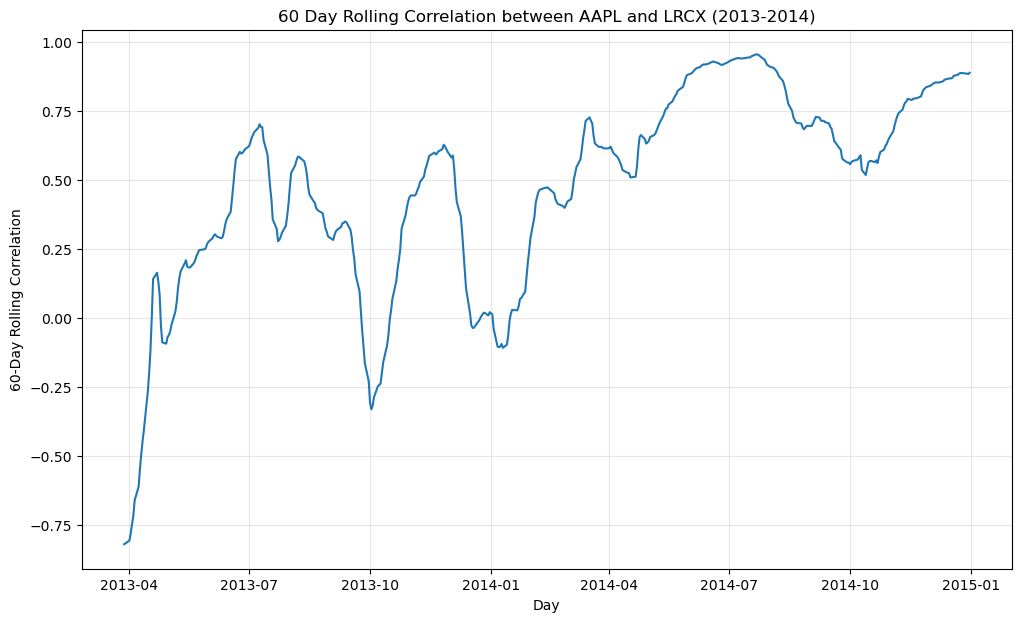

In [50]:
rolling_correlation = a1.rolling(window=60).corr(a2)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.plot(rolling_correlation)
plt.xlabel("Day")
plt.ylabel("60-Day Rolling Correlation")
plt.title("60 Day Rolling Correlation between AAPL and LRCX (2013-2014)");

Since the 60-day rolling correlation is highly time-varying, past high correlation does imply persistent future correlation.

### Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it is important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of the second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

Correlation: 0.35568078509408174


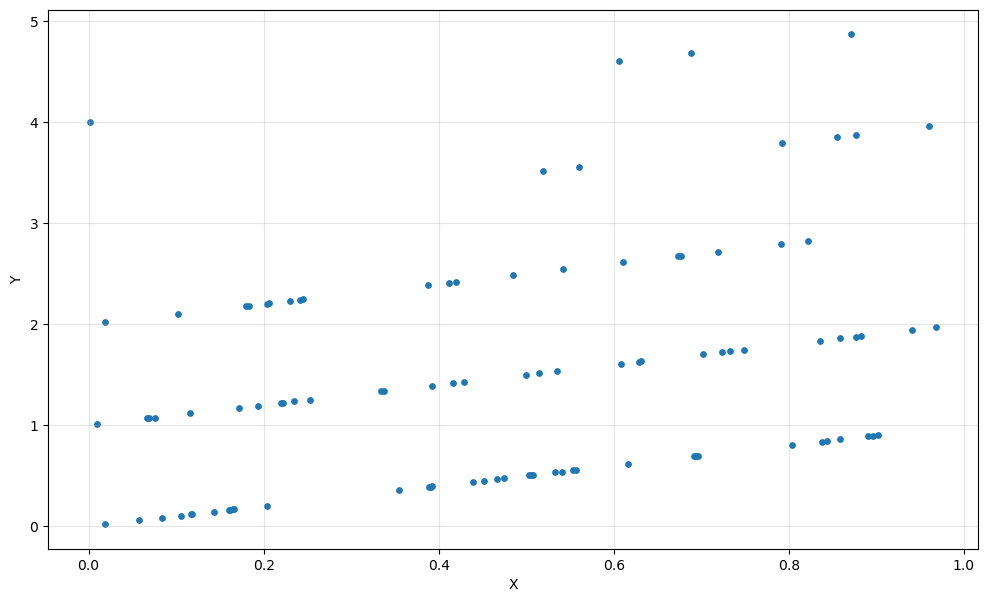

In [55]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.figure(figsize=(12, 7))
plt.grid(alpha=0.3)
plt.scatter(X, Y, s=15)
plt.xlabel("X")
plt.ylabel("Y");

print(f"Correlation: {np.corrcoef(X, Y)[0, 1]}")

In conclusion, correlation is a powerful technique, but as always in statistics, one should be careful not to interpret results where there are none.